# Hough Transform Testing

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as nd
import random

In [73]:
# Find all normal lines from point pairs
def points2lines(points):
    r,c = points.shape
    points = np.hstack([points, np.ones([r,1])])
    lines = np.zeros([1,3])
    r,c = points.shape
    while(r>1):
        for i in np.arange(1,r):
            line = np.cross(points[i,:], points[0,:])
            lines = np.vstack([lines, line])
        points = points[1:,:]
        r,c = points.shape
    lines = lines[1:,:]
    return lines


# Convert linear eqn to rho-theta
def linear2hough(lines):
    rhotheta = np.zeros([lines.shape[0],2])
    for i in range(lines.shape[0]):
        slope = -lines[i,0]/lines[i,1]
        theta = math.atan(-1/slope)
        if theta !=(0):
            b = -lines[i,2]/lines[i,1]
            x = -b/(slope+1/slope)
            y = slope*x + b
            rho = x*np.cos(theta) + y*np.sin(theta)
        else:
            rho = -lines[i,2]/lines[i,0]
        rhotheta[i,:] = [rho, theta]
    return rhotheta

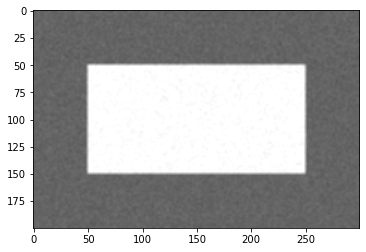

In [74]:
# Create image with lines
r = 200
c = 300
image = 100*np.ones([200,300])
image[50:-50,50:-50] = 255

# Add noise to the image
sigma = 10
mean = 0
noise = sigma*np.random.randn(r,c) + mean
image = image+noise
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Smooth the image
box = np.ones([3,3])/9
image = nd.convolve(image,box)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

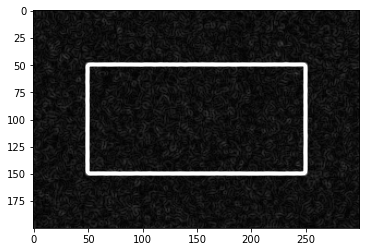

In [75]:
# Find the edges
sobelx = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])

sobely = np.array([[ 1, 2, 1],
                   [ 0, 0, 0],
                   [-1,-2,-1]])

Ix = nd.convolve(image,sobelx)
Iy = nd.convolve(image,sobely)
mag = np.sqrt(Ix**2+Iy**2)
plt.imshow(mag, cmap='gray', vmin=0, vmax=255)

49


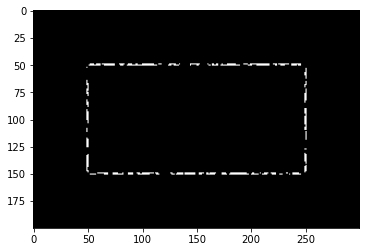

In [76]:
# Submax supression
threshold = 0.90
edgels = 1*( mag >= threshold*np.amax(mag) )
xy = np.where(mag >= threshold*np.amax(mag))
print(xy[0][0])
plt.imshow(edgels, cmap='gray')

# RANSAC
Random Sample Consensus

In [77]:
def RANSAC(data,model):
    # probability that one sample is clean
    p = 0.99
    # probablility that point is an outlier
    e = 0.75
    # number of samples needed
    N = np.log(1-p) / np.log(1-(1-e)**model)
    N = np.int(np.round(N))

    bestFit = 0

    i = 1
    while i <= N:
        pair = np.random.randint()
        print(pair)
        i += 1
    return bestFit


In [78]:
RANSAC(edgels,2)

TypeError: choice() got an unexpected keyword argument 'k'